In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from lheHelper import getLHEevents,getInfo,EventDict

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [2]:
fList = ['../processFolders/pp2GGN1N1/Events/run_01_decayed_1/unweighted_events.lhe.gz',
         '../processFolders/pp2GGN1N1/Events/run_02_decayed_1/unweighted_events.lhe.gz',
         '../processFolders/pp2GGN1N1/Events/run_03_decayed_1/unweighted_events.lhe.gz']

In [3]:
infoDict = {f : getInfo(f) for f in fList}

In [4]:
for f,infoD in infoDict.items():
    nevents,events = getLHEevents(f)
    pDict = EventDict.fromEvents(events,nevents,
                                    pdgs=[1000021,1000022, 'jet'],
                                    status=[1,2],labels=['go','n1', 'jet'])
    
    # Add met:
    pDict.particleDict['met'] = pDict.n1[0]+pDict.n1[1]    
    infoD.update({'pDict' : pDict})

#--------------------------------------------------------------------------
#                         FastJet release 3.4.1
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [5]:
# Sort by mass
infoDict = {key : val for key,val in sorted(list(infoDict.items()), key = lambda x: x[1]['mGluino'])}

In [6]:
for infoD in infoDict.values():
    print(r'mGluino = %1.0f GeV : total xsec = %1.2e pb' %(infoD['mGluino'],sum(infoD['pDict'].go[0].weight)))

mGluino = 1500 GeV : total xsec = 4.30e-32 pb
mGluino = 1500 GeV : total xsec = 5.21e-35 pb
mGluino = 1500 GeV : total xsec = 5.64e-38 pb


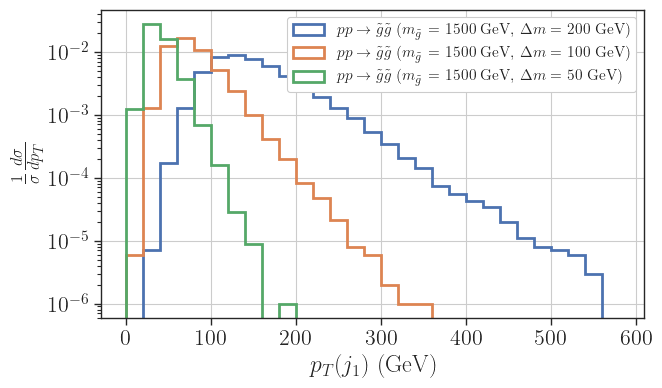

In [7]:
plt.figure(figsize=(7,4))
bins=np.arange(0.,600.0,20.0)
for infoD in infoDict.values():
    j = infoD['pDict'].jet[0] # Use only highest pT jet
    w = np.array(j.weight)
    label = infoD['process']
    label += r' ($m_{\tilde{g}}$ = %1.0f GeV, $\Delta m  = $ %1.0f GeV)' %(infoD['mGluino'],infoD['mGluino']-infoD['mN1'])
    plt.hist(j.PT,bins=bins,weights=w,density=True,
             histtype='step',label=label,linewidth=2)

plt.legend(loc='upper right',framealpha=1.0,fontsize=11)
plt.yscale('log')
plt.xlabel(r'$p_T(j_1)$ (GeV)')
plt.ylabel(r'$\frac{1}{\sigma}\frac{d\sigma}{d p_T}$')
plt.grid()
plt.show()

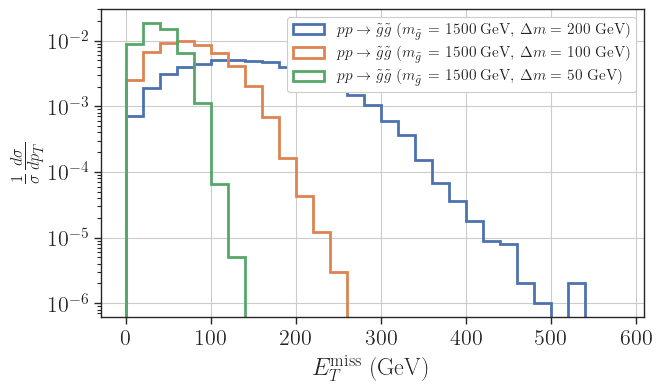

In [8]:
plt.figure(figsize=(7,4))
bins=np.arange(0.,600.0,20.0)
for infoD in infoDict.values():
    met = infoD['pDict'].met # Use only highest pT jet
    w = np.array(met.weight)
    label = infoD['process']
    label += r' ($m_{\tilde{g}}$ = %1.0f GeV, $\Delta m  = $ %1.0f GeV)' %(infoD['mGluino'],infoD['mGluino']-infoD['mN1'])
    plt.hist(met.PT,bins=bins,weights=w,density=True,
             histtype='step',label=label,linewidth=2)

plt.legend(loc='upper right',framealpha=1.0,fontsize=11)
plt.yscale('log')
plt.xlabel(r'$E_T^{\rm miss}$ (GeV)')
plt.ylabel(r'$\frac{1}{\sigma}\frac{d\sigma}{d p_T}$')
plt.grid()
plt.show()

In [9]:
def angleDiff(x1,x2):
    d = x1-x2
    if d > np.pi:
        d = d-2*np.pi
    elif d < -np.pi:
        d = d+2*np.pi
    return d

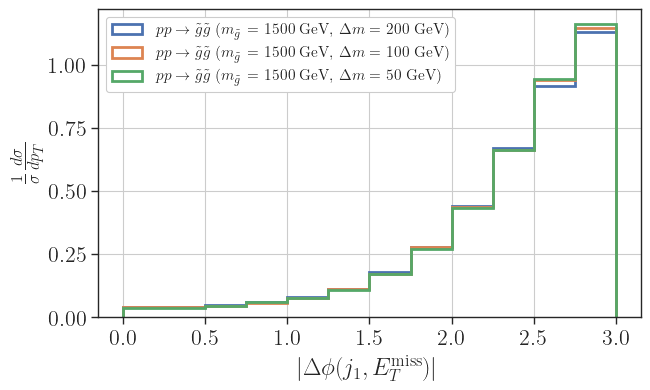

In [10]:
plt.figure(figsize=(7,4))
bins=np.arange(0,np.pi,0.25)
for infoD in infoDict.values():
    deltaPhi = [np.abs(angleDiff(x.Phi,y.Phi)) for x,y in zip(infoD['pDict'].met,infoD['pDict'].jet[0])]
    w = np.array(met.weight)
    label = infoD['process']
    label += r' ($m_{\tilde{g}}$ = %1.0f GeV, $\Delta m  = $ %1.0f GeV)' %(infoD['mGluino'],infoD['mGluino']-infoD['mN1'])
    plt.hist(deltaPhi,bins=bins,weights=w,density=True,
             histtype='step',label=label,linewidth=2)

plt.legend(loc='upper left',framealpha=1.0,fontsize=11)
# plt.yscale('log')
plt.xlabel(r'$|\Delta \phi(j_1,E_{T}^{\rm miss})|$')
plt.ylabel(r'$\frac{1}{\sigma}\frac{d\sigma}{d p_T}$')
plt.grid()
plt.show()